# The final dataset is built here, comprehending:
* Water Quality
* Manual Bacteria Counting
* Automatic Bacteria Counting
* Rain Data
* CSO Data
* Tides

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Paths

In [2]:
data_folder = os.path.join("..", "data")

further_features_folder = os.path.join(data_folder, "further_features")
temporary_results_folder = os.path.join(data_folder, "temporary results")

csos_folder = os.path.join(data_folder, "csos")
rainfall_folder = os.path.join(data_folder, "rainfall")
tide_folder = os.path.join(data_folder, "tide")

# Load Bacteria Data

In [3]:
bacteria_df = pd.read_excel(
    os.path.join(temporary_results_folder, "bacteria_dataset.xlsx")
)

In [4]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.710,0.028284,10.00,4.242641,3.0,0.000000
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.745,0.007071,17.00,2.828427,6.5,0.707107
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.845,0.021213,23.50,3.535534,7.5,3.535534
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.290,0.028284,16.00,5.656854,6.0,1.414214
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.740,NaN,54.00,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.765,0.007071,6.00,2.828427,7.5,3.535534
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.785,0.007071,14.00,0.000000,8.0,2.828427
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.780,0.000000,12.50,3.535534,5.0,2.828427
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.140,0.028284,20.00,7.071068,5.0,0.000000


In [5]:
bacteria_df.dtypes

DateTime                    datetime64[ns]
Site                                object
Technician Water Quality            object
Technician Counting                 object
Temp C_mean                        float64
Temp C_std                         float64
Ph_mean                            float64
Ph_std                             float64
Cond (ms)_mean                     float64
Cond (ms)_std                      float64
Coliform (1ml)_mean                float64
Coliform (1ml)_std                 float64
Ecoli (1ml)_mean                   float64
Ecoli (1ml)_std                    float64
dtype: object

# Load and add CSO info

In [6]:
hinterland_csos_dict = {}
middle_csos_dict = {}
sea_csos_dict = {}

for folder in os.listdir(csos_folder):
    if folder.startswith("hinterland"):
        for file in os.listdir(os.path.join(csos_folder, folder)):
            filename = file.split(".")[0]
            hinterland_csos_dict[filename] = pd.read_excel(
                os.path.join(csos_folder, folder, file)
            )
    elif folder.startswith("middle"):
        for file in os.listdir(os.path.join(csos_folder, folder)):
            filename = file.split(".")[0]
            middle_csos_dict[filename] = pd.read_excel(
                os.path.join(csos_folder, folder, file)
            )
    elif folder.startswith("sea"):
        for file in os.listdir(os.path.join(csos_folder, folder)):
            filename = file.split(".")[0]
            sea_csos_dict[filename] = pd.read_excel(
                os.path.join(csos_folder, folder, file)
            )

In [7]:
hinterland_csos_dict[list(hinterland_csos_dict.keys())[0]]

,StartDateTime,EndDateTime,Active
0,2023-01-30 14:22:00,2023-01-30 14:26:00,True
1,2023-01-30 14:26:00,2023-02-01 14:08:00,False
2,2023-02-01 14:08:00,2023-02-01 14:12:00,True
3,2023-02-01 14:12:00,2023-02-03 15:22:00,False
4,2023-02-03 15:22:00,2023-02-03 15:26:00,True
...,...,...,...
148,2023-08-05 14:34:00,2023-08-05 14:56:00,True
149,2023-08-05 14:56:00,2023-08-18 21:54:00,False
150,2023-08-18 21:54:00,2023-08-18 22:16:00,True
151,2023-08-18 22:16:00,2023-09-01 10:08:00,False


In [8]:
# Add float column in bacteria_df for each type of CSO
# to indicate the % of open CSOs at the time a sample was taken
bacteria_df["cso_hinterland"] = 0.0
bacteria_df["cso_middle"] = 0.0
bacteria_df["cso_sea"] = 0.0

for index, row in bacteria_df.iterrows():
    date = row["DateTime"]
    count_percent = 0
    for cso_df in hinterland_csos_dict.values():
        active_delta_dates = cso_df[cso_df['Active'] == True]
        if ((cso_df['StartDateTime'] <= date) & (cso_df['EndDateTime'] >= date)).any():
            count_percent += 1
    bacteria_df.at[index, "cso_hinterland"] = count_percent / len(hinterland_csos_dict)
    
    count_percent = 0
    for cso_df in middle_csos_dict.values():
        active_delta_dates = cso_df[cso_df['Active'] == True]
        if ((cso_df['StartDateTime'] <= date) & (cso_df['EndDateTime'] >= date)).any():
            count_percent += 1
    bacteria_df.at[index, "cso_middle"] = count_percent / len(middle_csos_dict)
    
    count_percent = 0
    for cso_df in sea_csos_dict.values():
        active_delta_dates = cso_df[cso_df['Active'] == True]
        if ((cso_df['StartDateTime'] <= date) & (cso_df['EndDateTime'] >= date)).any():
            count_percent += 1
    bacteria_df.at[index, "cso_sea"] = count_percent / len(sea_csos_dict) 

In [9]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std,cso_hinterland,cso_middle,cso_sea
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.710,0.028284,10.00,4.242641,3.0,0.000000,0.333333,0.285714,0.0
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.745,0.007071,17.00,2.828427,6.5,0.707107,0.500000,0.285714,0.0
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.845,0.021213,23.50,3.535534,7.5,3.535534,0.833333,0.428571,0.0
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.290,0.028284,16.00,5.656854,6.0,1.414214,0.833333,0.428571,0.0
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.740,NaN,54.00,NaN,4.0,NaN,0.833333,0.571429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.765,0.007071,6.00,2.828427,7.5,3.535534,0.333333,0.285714,0.0
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.785,0.007071,14.00,0.000000,8.0,2.828427,0.500000,0.285714,0.0
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.780,0.000000,12.50,3.535534,5.0,2.828427,0.833333,0.428571,0.0
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.140,0.028284,20.00,7.071068,5.0,0.000000,0.833333,0.428571,0.0


# Load and add Rainfall info

In [10]:
rainfall_station_dict = {}

for file in os.listdir(rainfall_folder):
    filename = file.split(".")[0]
    rainfall_station_dict[filename] = pd.read_csv(
        os.path.join(rainfall_folder, file), index_col="dateTime"
    )
    rainfall_station_dict[filename].index = pd.to_datetime(rainfall_station_dict[filename].index).tz_localize(None)
    rainfall_station_dict[filename].sort_index(inplace=True)

In [11]:
bacteria_df['rained'] = False

In [12]:
hours_before = 6

In [ ]:
for index, row in bacteria_df.iterrows():
    
    sum_per_site = []
    
    for site, site_rainfall_df in rainfall_station_dict.items():
        # get datetime index of sample which is closest to the current row datetime
        site_idx = site_rainfall_df.index[
            site_rainfall_df.index.get_indexer(
                [row["DateTime"]], method="nearest"
            )
        ]
        # get datetime which is 'hours_before' hours before the current row datetime
        initial_idx = site_idx - pd.Timedelta(hours=hours_before)
        
        # get actual datetime index which is closest to the initial_idx 
        # (it could be more or less than 'hours_before' hours before the sample datetime)
        # TODO: this could be handled better after
        initial_site_idx = site_rainfall_df.index[
            site_rainfall_df.index.get_indexer(
                [initial_idx], method="nearest"
            )
        ]
        # get actual time range in hours
        actual_time_range = site_idx - initial_site_idx
        actual_time_range = actual_time_range[0].seconds // 3600
        
        # get sum of rainfall hours_before hours before sample
        if actual_time_range > 0: 
            initial_site_idx_str = initial_site_idx.strftime('%Y-%m-%d %H:%M:%S')[0]
            site_idx_str = site_idx.strftime('%Y-%m-%d %H:%M:%S')[0]
            
            sum_per_site.append(site_rainfall_df.loc[
                initial_site_idx_str : site_idx_str
            ]["value"].sum())
        else:
            sum_per_site.append(0)
            
    mean_rainfall = sum(sum_per_site) / len(sum_per_site)
    if mean_rainfall > 0:
        bacteria_df.at[index, "rained"] = True

In [ ]:
bacteria_df.columns.to_list()

['DateTime',
 'Site',
 'Technician Water Quality',
 'Technician Counting',
 'Temp C_mean',
 'Temp C_std',
 'Ph_mean',
 'Ph_std',
 'Cond (ms)_mean',
 'Cond (ms)_std',
 'Coliform (1ml)_mean',
 'Coliform (1ml)_std',
 'Ecoli (1ml)_mean',
 'Ecoli (1ml)_std',
 'cso_hinterland',
 'cso_middle',
 'cso_sea',
 'rained']

# Checkpoint: Store bacteria_df

In [ ]:
bacteria_df.to_excel(os.path.join(temporary_results_folder, "cp_bacteria_dataset.xlsx"), index=False)

# Checkpoint: Load bacteria_df

In [14]:
bacteria_df = pd.read_excel(
    os.path.join(temporary_results_folder, "cp_bacteria_dataset.xlsx"),
)
bacteria_df.drop(columns=["Unnamed: 0"], inplace=True)

In [15]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std,cso_hinterland,cso_middle,cso_sea,rained
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.710,0.028284,10.00,4.242641,3.0,0.000000,0.333333,0.285714,0.0,False
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.745,0.007071,17.00,2.828427,6.5,0.707107,0.500000,0.285714,0.0,False
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.845,0.021213,23.50,3.535534,7.5,3.535534,0.833333,0.428571,0.0,True
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.290,0.028284,16.00,5.656854,6.0,1.414214,0.833333,0.428571,0.0,False
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.740,NaN,54.00,NaN,4.0,NaN,0.833333,0.571429,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.765,0.007071,6.00,2.828427,7.5,3.535534,0.333333,0.285714,0.0,False
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.785,0.007071,14.00,0.000000,8.0,2.828427,0.500000,0.285714,0.0,False
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.780,0.000000,12.50,3.535534,5.0,2.828427,0.833333,0.428571,0.0,True
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.140,0.028284,20.00,7.071068,5.0,0.000000,0.833333,0.428571,0.0,False


# Load and add Tides Info

In [16]:
tides_df = pd.read_excel(
    os.path.join(tide_folder, "tide_dataset.xlsx")
)

tides_df['dateTime'] = pd.to_datetime(tides_df['dateTime']).dt.tz_localize(None)

In [17]:
tides_df

,dateTime,value
0,2023-01-30 00:00:00,-1.112
1,2023-01-30 00:15:00,-1.301
2,2023-01-30 00:30:00,-1.496
3,2023-01-30 00:45:00,-1.662
4,2023-01-30 01:00:00,-1.793
...,...,...
21947,2023-09-09 22:45:00,2.111
21948,2023-09-09 23:00:00,1.894
21949,2023-09-09 23:15:00,1.645
21950,2023-09-09 23:30:00,1.409


In [18]:
tides_df.set_index("dateTime", inplace=True)

In [19]:
tides_df.dtypes

value    float64
dtype: object

<Axes: xlabel='dateTime', ylabel='value'>

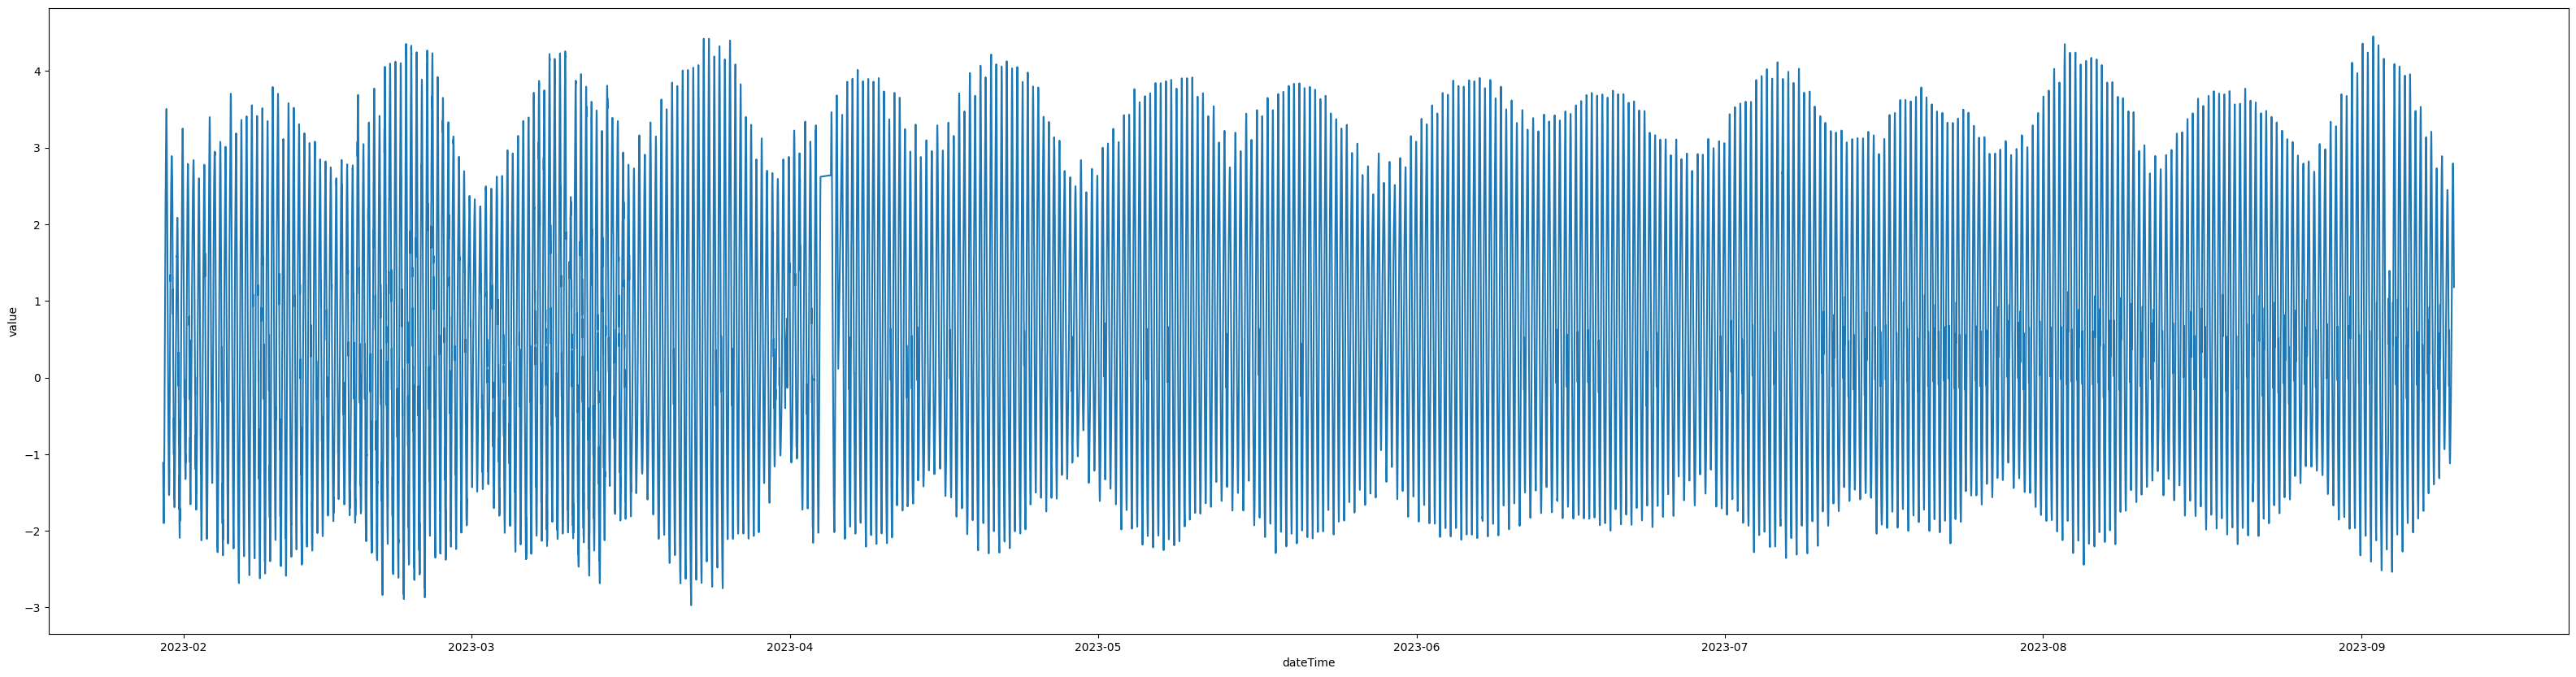

In [20]:
plt.figure(figsize=(40, 10))

sns.lineplot(data=tides_df, x="dateTime", y="value")

In [21]:
# Add float column in bacteria_df that can assume a value between -1 and 1
# such that a sample taken at low tide has a value close to -1
# and a sample taken at high tide has a value close to 1
# NB: low and high tides are defined locally for each day since the max and min values of the tide
# are different for each day

bacteria_df["tide_value"] = 0.0

for index, row in bacteria_df.iterrows():
    date = row["DateTime"]
    closest_index = tides_df.index[
        tides_df.index.get_indexer([date], method="nearest")
    ]
    closest_tide = tides_df.loc[closest_index]["value"].values[0]
    
    closest_before_index = tides_df.index[
        tides_df.index.get_indexer([date - pd.Timedelta(hours=12)], method="nearest")
    ].values[0]
    
    closest_after_index = tides_df.index[
        tides_df.index.get_indexer([date + pd.Timedelta(hours=12)], method="nearest")
    ].values[0]    
        
    min_tide = tides_df.loc[closest_before_index : closest_after_index]["value"].min()
    max_tide = tides_df.loc[closest_before_index : closest_after_index]["value"].max()
    
    # scale tide value between -1 and 1
    tide_value = (2 * ((closest_tide - min_tide) / (max_tide - min_tide))) - 1
    
    bacteria_df.at[index, "tide_value"] = tide_value
    

In [22]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std,cso_hinterland,cso_middle,cso_sea,rained,tide_value
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.710,0.028284,10.00,4.242641,3.0,0.000000,0.333333,0.285714,0.0,False,0.240592
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.745,0.007071,17.00,2.828427,6.5,0.707107,0.500000,0.285714,0.0,False,-0.589693
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.845,0.021213,23.50,3.535534,7.5,3.535534,0.833333,0.428571,0.0,True,0.215941
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.290,0.028284,16.00,5.656854,6.0,1.414214,0.833333,0.428571,0.0,False,0.960796
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.740,NaN,54.00,NaN,4.0,NaN,0.833333,0.571429,0.0,True,-0.476808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.765,0.007071,6.00,2.828427,7.5,3.535534,0.333333,0.285714,0.0,False,-0.365662
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.785,0.007071,14.00,0.000000,8.0,2.828427,0.500000,0.285714,0.0,False,-0.907697
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.780,0.000000,12.50,3.535534,5.0,2.828427,0.833333,0.428571,0.0,True,-0.400976
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.140,0.028284,20.00,7.071068,5.0,0.000000,0.833333,0.428571,0.0,False,0.350163


# Final check and store

In [23]:
bacteria_df.isna().sum()

DateTime                      0
Site                          0
Technician Water Quality    182
Technician Counting           0
Temp C_mean                   0
Temp C_std                    7
Ph_mean                       0
Ph_std                        7
Cond (ms)_mean                0
Cond (ms)_std                 7
Coliform (1ml)_mean           0
Coliform (1ml)_std            7
Ecoli (1ml)_mean              0
Ecoli (1ml)_std               7
cso_hinterland                0
cso_middle                    0
cso_sea                       0
rained                        0
tide_value                    0
dtype: int64

In [24]:
bacteria_df.dtypes

DateTime                    datetime64[ns]
Site                                object
Technician Water Quality            object
Technician Counting                 object
Temp C_mean                        float64
Temp C_std                         float64
Ph_mean                            float64
Ph_std                             float64
Cond (ms)_mean                     float64
Cond (ms)_std                      float64
Coliform (1ml)_mean                float64
Coliform (1ml)_std                 float64
Ecoli (1ml)_mean                   float64
Ecoli (1ml)_std                    float64
cso_hinterland                     float64
cso_middle                         float64
cso_sea                            float64
rained                                bool
tide_value                         float64
dtype: object

In [25]:
bacteria_df['rained'] = bacteria_df['rained'].astype(int)

In [26]:
bacteria_df.to_excel(
    os.path.join(temporary_results_folder, "overall_dataset.xlsx"),
    index=False,
)